In [81]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
cord_data = pd.read_csv('../data/4_intervention_CORD19_sentences/4_categories_intervention.csv')

In [5]:
cord_data.drop_duplicates(subset=['sentence_text','intervention'], keep='first')

,sentence_id,sentence_text,publish_time,year,File_Name,intervention
0,155136,The findings highlight the importance of acces...,2021-05-17,2021,intervention1_case_identification.csv,case identification and contact tracking
1,861094,3 4 The closure of universities and public lib...,2021-03-03,2021,intervention1_case_identification.csv,case identification and contact tracking
2,939904,"In other words , constraints on indoor and out...",2020-12-09,2020,intervention1_case_identification.csv,case identification and contact tracking
3,957448,Such devices also play a critical role in faci...,2021-03-06,2021,intervention1_case_identification.csv,case identification and contact tracking
4,1299910,"This might lead to a new pattern : "" Public In...",2020-10-06,2020,intervention1_case_identification.csv,case identification and contact tracking
...,...,...,...,...,...,...
79360,52017359,16 Access to healthcare facilities has been re...,2021-05-27,2021,intervention4_travel_restriction.csv,travel restriction
79361,52027712,Some municipalities set up immigration offices...,2017-09-19,2017,intervention4_travel_restriction.csv,travel restriction
79362,52054148,1 The national state of disaster restricted tr...,2021-05-28,2021,intervention4_travel_restriction.csv,travel restriction
79363,52062111,"On March 16 , the US government announced new ...",2021-05-07,2021,intervention4_travel_restriction.csv,travel restriction


In [6]:
cord_data.publish_time = pd.to_datetime(cord_data.publish_time).dt.strftime('%Y-%m-%d')
list_YM = [i[:-3] for i in  list(cord_data['publish_time'])]
cord_data["YM"] = list_YM

In [76]:
#create a monthly dataframe
cord_monthly = cord_data.groupby(['intervention', 'YM', 'year']).count()
cord_monthly = cord_monthly[['sentence_text']].reset_index()
cord_monthly = cord_monthly[cord_monthly['year'] > 2019]
cord_monthly.rename(columns={'intervention': 'NPI_group'}, inplace=True)
cord_monthly.head()

,NPI_group,YM,year,sentence_text
204,case identification and contact tracking,2020-01,2020,1155
205,case identification and contact tracking,2020-02,2020,117
206,case identification and contact tracking,2020-03,2020,457
207,case identification and contact tracking,2020-04,2020,1098
208,case identification and contact tracking,2020-05,2020,1948


In [89]:
cord_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 204 to 754
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NPI_group      94 non-null     object
 1   YM             94 non-null     object
 2   year           94 non-null     int64 
 3   sentence_text  94 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 5.7+ KB


In [61]:
dict = {'NPI_group':['case identification and contact tracking', 'risk communication', 'social distance', 'travel restriction'],
        'YM':['2020-01', '2020-01', '2020-01', '2020-01'],
        'similar_sentence':[0, 0, 0, 0],
        'year': [2020, 2020, 2020, 2020]
       }
  
new_rows = pd.DataFrame(dict)
  
release_data = pd.concat([new_rows, release_data])
release_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11046 entries, 0 to 11041
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NPI_group         11046 non-null  object        
 1   YM                11046 non-null  object        
 2   similar_sentence  11046 non-null  object        
 3   year              11046 non-null  int64         
 4   Unnamed: 0        11042 non-null  float64       
 5   sentence_ID       11042 non-null  float64       
 6   release_ID        11042 non-null  float64       
 7   date              11042 non-null  datetime64[ns]
 8   title             11042 non-null  object        
 9   minister          11042 non-null  object        
 10  closest_sentence  11042 non-null  object        
 11  similarity_score  11042 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 1.1+ MB


In [62]:
#create a monthly dataframe
release_monthly = release_data.groupby(['NPI_group', 'YM','year']).count()

release_monthly = release_monthly[['similar_sentence']].reset_index()
release_monthly = release_monthly[release_monthly['year'] < 2022]

release_monthly

,NPI_group,YM,year,similar_sentence
0,case identification and contact tracking,2020-01,2020,1
1,case identification and contact tracking,2020-02,2020,15
2,case identification and contact tracking,2020-03,2020,89
3,case identification and contact tracking,2020-04,2020,115
4,case identification and contact tracking,2020-05,2020,129
...,...,...,...,...
106,travel restriction,2021-08,2021,50
107,travel restriction,2021-09,2021,110
108,travel restriction,2021-10,2021,104
109,travel restriction,2021-11,2021,102


In [87]:
release_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 110
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NPI_group         96 non-null     object
 1   YM                96 non-null     object
 2   year              96 non-null     int64 
 3   similar_sentence  96 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 5.8+ KB


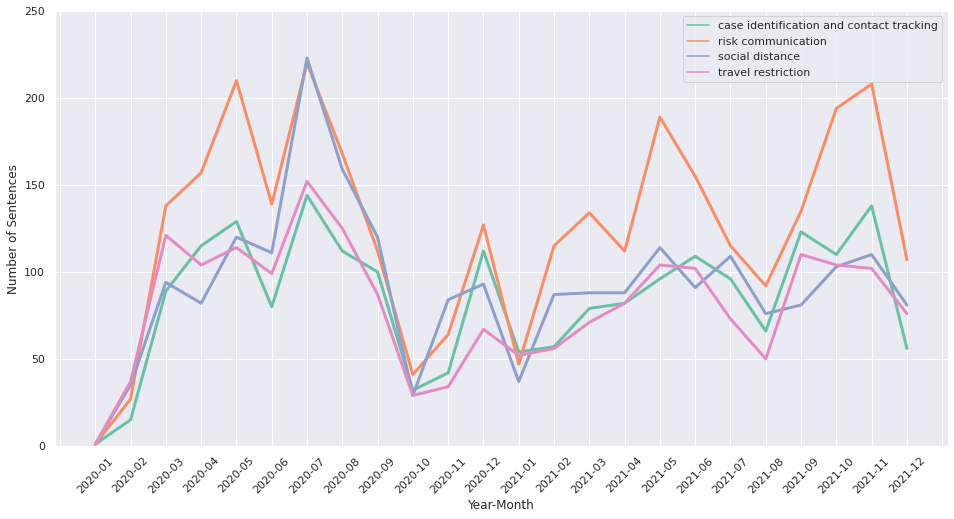

In [65]:
sns.set(rc={'figure.figsize':(16,8)})

ax = sns.lineplot(data=release_monthly, x ='YM', y = 'similar_sentence',
                  hue='NPI_group', palette='Set2',
                  legend='full', lw=3)

ax.set_ylim(bottom=0, top=250)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Number of Sentences')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

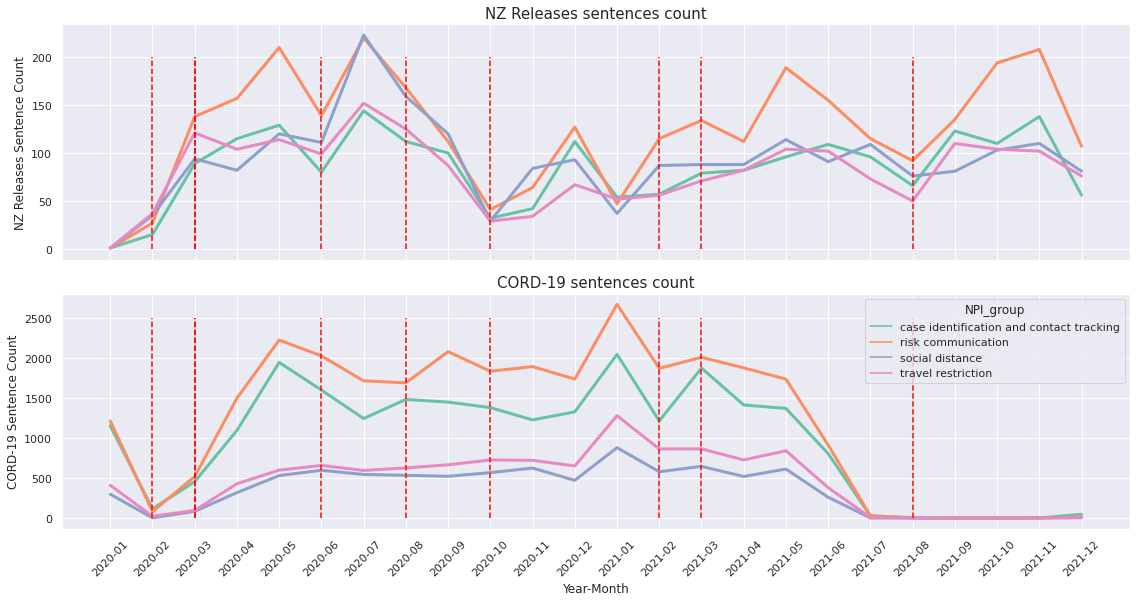

In [80]:
# create a grid of subplots with 2 rows
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, 
    sharex=True,
    figsize=(16, 8)
)
# adjust the space between the subplots
fig.tight_layout(pad=2)
# create the first subplot
sns.lineplot(x='YM', y='similar_sentence',
             data=release_monthly,
             hue='NPI_group', palette='Set2',
             legend=False, lw=3, ax=ax1)
ax1.set_title("NZ Releases sentences count", fontsize=15)
ax1.set_ylabel("NZ Releases Sentence Count")
# add key dates to the first subplot
ax1.vlines(x='2020-02', ymin=0, ymax=200,
           color='red', linestyle='--', label='First case')
ax1.vlines(x='2020-03', ymin=0, ymax=200,
           color='red', linestyle='--', label='Border closed')
ax1.vlines(x='2020-03', ymin=0, ymax=200,
           color='red', linestyle='--', label='National lockdown')
ax1.vlines(x='2020-06', ymin=0, ymax=200,
           color='red', linestyle='--', label='Back to normal')
ax1.vlines(x='2020-08', ymin=0, ymax=200,
           color='red', linestyle='--', label='Auckland lockdown')
ax1.vlines(x='2020-10', ymin=0, ymax=200,
           color='red', linestyle='--', label='Auckland lockdown lifted')
ax1.vlines(x='2021-02', ymin=0, ymax=200,
           color='red', linestyle='--', label='Auckland lockdown')
ax1.vlines(x='2021-03', ymin=0, ymax=200,
           color='red', linestyle='--', label='Auckland lockdown lifted')
ax1.vlines(x='2021-08', ymin=0, ymax=200,
           color='red', linestyle='--', label='National lockdown')
# create the second subplot
sns.lineplot(x='YM', y='sentence_text',
             data=cord_monthly,
             hue='NPI_group', palette='Set2',
             legend=True, lw=3, ax=ax2)
ax2.set_title("CORD-19 sentences count", fontsize=15)
ax2.set_xlabel("Year-Month")
ax2.set_ylabel("CORD-19 Sentence Count")
# add key dates to the second subplot
ax2.vlines(x='2020-02', ymin=0, ymax=2500,
           color='red', linestyle='--', label='First case')
ax2.vlines(x='2020-03', ymin=0, ymax=2500,
           color='red', linestyle='--', label='Border closed')
ax2.vlines(x='2020-03', ymin=0, ymax=2500,
           color='red', linestyle='--', label='National lockdown')
ax2.vlines(x='2020-06', ymin=0, ymax=2500,
           color='red', linestyle='--', label='Back to normal')
ax2.vlines(x='2020-08', ymin=0, ymax=2500,
           color='red', linestyle='--', label='Auckland lockdown')
ax2.vlines(x='2020-10', ymin=0, ymax=2500,
           color='red', linestyle='--', label='Auckland lockdown lifted')
ax2.vlines(x='2021-02', ymin=0, ymax=2500,
           color='red', linestyle='--', label='Auckland lockdown')
ax2.vlines(x='2021-03', ymin=0, ymax=2500,
           color='red', linestyle='--', label='Auckland lockdown lifted')
ax2.vlines(x='2021-08', ymin=0, ymax=2500,
           color='red', linestyle='--', label='National lockdown')
plt.xticks(rotation=45)


In [93]:
# Linear regression between CORD19 and NZ releases

# create separate datasets for each NPI category
ci_cord = cord_monthly[cord_monthly['NPI_group'] == 'case identification and contact tracking']
ci_release = release_monthly[release_monthly['NPI_group'] == 'case identification and contact tracking']
ci_data= ci_cord.merge(ci_release, on=['NPI_group', 'YM', 'year'], how='outer')

rc_cord = cord_monthly[cord_monthly['NPI_group'] == 'risk communication']
rc_release = release_monthly[release_monthly['NPI_group'] == 'risk communication']
rc_data= rc_cord.merge(rc_release, on=['NPI_group', 'YM', 'year'], how='outer')

sd_cord = cord_monthly[cord_monthly['NPI_group'] == 'social distance']
sd_release = release_monthly[release_monthly['NPI_group'] == 'social distance']
sd_data= sd_cord.merge(sd_release, on=['NPI_group', 'YM', 'year'], how='outer')

tr_cord = cord_monthly[cord_monthly['NPI_group'] == 'travel restriction']
tr_release = release_monthly[release_monthly['NPI_group'] == 'travel restriction']
tr_data= tr_cord.merge(tr_release, on=['NPI_group', 'YM', 'year'], how='outer')

In [94]:
rc_data

,NPI_group,YM,year,sentence_text,similar_sentence
0,risk communication,2020-01,2020,1215,1
1,risk communication,2020-02,2020,82,27
2,risk communication,2020-03,2020,521,138
3,risk communication,2020-04,2020,1502,157
4,risk communication,2020-05,2020,2228,210
5,risk communication,2020-06,2020,2030,139
6,risk communication,2020-07,2020,1718,220
7,risk communication,2020-08,2020,1693,168
8,risk communication,2020-09,2020,2083,112
9,risk communication,2020-10,2020,1838,41


In [96]:
sd_data = sd_data.fillna(0)
sd_data

,NPI_group,YM,year,sentence_text,similar_sentence
0,social distance,2020-01,2020,300.0,1
1,social distance,2020-02,2020,4.0,35
2,social distance,2020-03,2020,86.0,94
3,social distance,2020-04,2020,320.0,82
4,social distance,2020-05,2020,533.0,120
5,social distance,2020-06,2020,599.0,111
6,social distance,2020-07,2020,547.0,223
7,social distance,2020-08,2020,536.0,159
8,social distance,2020-09,2020,524.0,120
9,social distance,2020-10,2020,570.0,29


In [100]:
tr_data = tr_data.fillna(0)
tr_data

,NPI_group,YM,year,sentence_text,similar_sentence
0,travel restriction,2020-01,2020,412.0,1
1,travel restriction,2020-02,2020,24.0,37
2,travel restriction,2020-03,2020,97.0,121
3,travel restriction,2020-04,2020,431.0,104
4,travel restriction,2020-05,2020,601.0,114
5,travel restriction,2020-06,2020,660.0,99
6,travel restriction,2020-07,2020,597.0,152
7,travel restriction,2020-08,2020,629.0,125
8,travel restriction,2020-09,2020,668.0,87
9,travel restriction,2020-10,2020,728.0,29


In [98]:
from sklearn.linear_model import LinearRegression

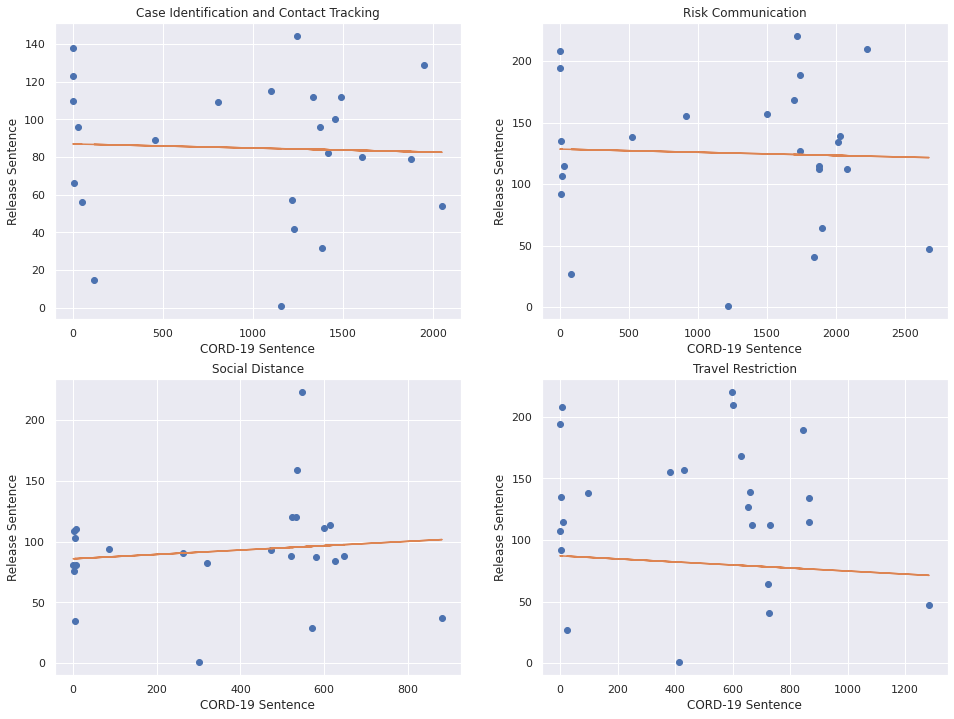

In [102]:
# Fit linear regression model for each product category dataset
model_ci = LinearRegression()
model_ci.fit(ci_data['sentence_text'].values.reshape(-1,1), ci_data['similar_sentence'])

model_rc = LinearRegression()
model_rc.fit(rc_data['sentence_text'].values.reshape(-1,1), rc_data['similar_sentence'])

model_sd = LinearRegression()
model_sd.fit(sd_data['sentence_text'].values.reshape(-1,1), sd_data['similar_sentence'])

model_tr = LinearRegression()
model_tr.fit(tr_data['sentence_text'].values.reshape(-1,1), tr_data['similar_sentence'])

# Create figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot regression relationship for each product category
axes[0, 0].plot(ci_data['sentence_text'], ci_data['similar_sentence'], 'o', label='Case Identification and Contact Tracking')
axes[0, 0].plot(ci_data['sentence_text'], model_ci.predict(ci_data['sentence_text'].values.reshape(-1,1)), '-', label='Regression')
axes[0, 0].set_xlabel('CORD-19 Sentence')
axes[0, 0].set_ylabel('Release Sentence')
axes[0, 0].set_title('Case Identification and Contact Tracking')

axes[0, 1].plot(rc_data['sentence_text'], rc_data['similar_sentence'], 'o', label='Risk Communication')
axes[0, 1].plot(rc_data['sentence_text'], model_rc.predict(rc_data['sentence_text'].values.reshape(-1,1)), '-', label='Regression')
axes[0, 1].set_xlabel('CORD-19 Sentence')
axes[0, 1].set_ylabel('Release Sentence')
axes[0, 1].set_title('Risk Communication')

axes[1, 0].plot(sd_data['sentence_text'], sd_data['similar_sentence'], 'o', label='Social Distance')
axes[1, 0].plot(sd_data['sentence_text'], model_sd.predict(sd_data['sentence_text'].values.reshape(-1,1)), '-', label='Regression')
axes[1, 0].set_xlabel('CORD-19 Sentence')
axes[1, 0].set_ylabel('Release Sentence')
axes[1, 0].set_title('Social Distance')

axes[1, 1].plot(tr_data['sentence_text'], rc_data['similar_sentence'], 'o', label='Travel Restriction')
axes[1, 1].plot(tr_data['sentence_text'], model_tr.predict(tr_data['sentence_text'].values.reshape(-1,1)), '-', label='Regression')
axes[1, 1].set_xlabel('CORD-19 Sentence')
axes[1, 1].set_ylabel('Release Sentence')
axes[1, 1].set_title('Travel Restriction')

# save figure or display to screen
#plt.savefig('regression_relationships.png')
plt.show()

